In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sdss.metadata import MetaData
meta = MetaData()

In [5]:
# data directories
work = "/home/edgar/astropology"
data_directory = f"{work}/data/spectra"

In [9]:
spectra = np.load(
    f"{data_directory}/filtered_spectra.npy",
    mmap_mode="r"
)

wave = np.load(f"{data_directory}/wave.npy")

w_distances = np.load(
    f"{data_directory}/sdss_wasserstein_45651.npy",
    mmap_mode="r" 
)


objectid_w = np.load(
    f"{data_directory}/ids_imputing.npy",
    mmap_mode="r"
).astype(int)

In [10]:
w_score = np.empty(w_distances.shape[0])

for idx, score in enumerate(w_distances):

    w_score[idx] = np.nanmean(score)

w_score *= 1/np.max(w_score)
w_rank = np.argsort(w_score)
w_ranked_objectid = objectid_w[w_rank]

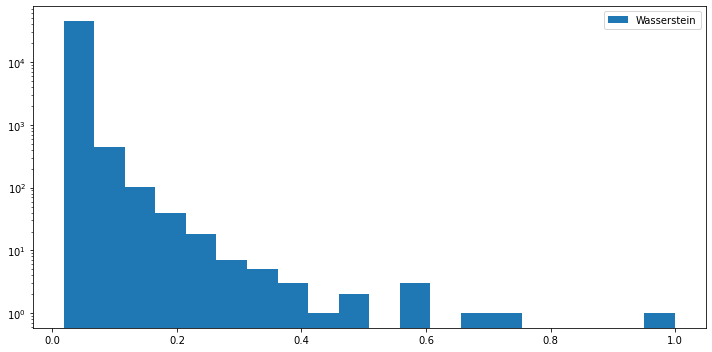

In [12]:
fig, ax = plt.subplots(
    sharey=True, ncols=1, nrows=1, tight_layout=True,
    figsize=(10, 5)
)
bins = 20
_ = ax.hist(w_score, bins=bins, label="Wasserstein")
ax.set_yscale("log")
ax.legend()

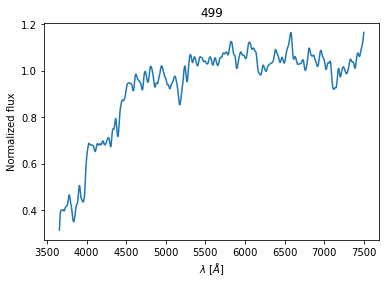

In [35]:
for rank in range(0, 500):
    rank *= 1
    spectrum = spectra[w_ranked_objectid[rank]]

    plt.clf()
    plt.plot(wave, spectrum)
    plt.title(f"{abs(rank):03d}")
    plt.xlabel("$\lambda$ [$\AA$]")
    plt.ylabel("Normalized flux")

    save_to = "/home/edgar/Downloads/spec/normal"
    plt.savefig(f"{save_to}/{abs(rank):03d}.pdf")

In [31]:
idx_id = np.stack((objectid_w[:91302//2], objectid_w[91302//2:]))

In [33]:
idx_id[1]

array([1621435005815252992, 2496224060971706368, 2266460216029636608, ...,
       2293483181942269952, 1537016426810861568, 1094430550518687744])